# Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 3, Finished, Available, Finished)

# Load Data

In [2]:
# Load data into pandas DataFrame from "/lakehouse/default/Files/buangan/eeg_features.csv"

df = pd.read_csv("/lakehouse/default/Files/buangan/eeg_features.csv")
display(df)

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, d09f3844-0e55-449e-ad52-77c2373fc0f6)

# Features Engine

## Split Data

In [3]:
# define variable x and y for train-test split

X = df.drop('label', axis=1)
y = df['label']

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 5, Finished, Available, Finished)

In [4]:
# Pisahkan data menjadi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 6, Finished, Available, Finished)

## Scaling data

In [5]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 7, Finished, Available, Finished)

# Modeling

## Model definition, Training, and Evaluation

In [6]:
# 1. Model Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 2. Model Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=500)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# 3. Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 8, Finished, Available, Finished)

2024-10-03:06:39:11,945 WARNING  [tracking_store.py:153] log_inputs not supported


2024-10-03:06:39:25,15 WARNING  [tracking_store.py:153] log_inputs not supported
2024-10-03:06:39:25,649 WARNING  [tracking_store.py:153] log_inputs not supported


2024-10-03:06:39:31,178 WARNING  [tracking_store.py:153] log_inputs not supported
2024-10-03:06:39:31,684 WARNING  [tracking_store.py:153] log_inputs not supported


2024-10-03:06:39:37,100 WARNING  [tracking_store.py:153] log_inputs not supported


StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 9, Finished, Available, Finished)

Evaluasi Model: SVM
Accuracy: 0.4713
Precision: 0.7574
Recall: 0.4713
F1 Score: 0.3261
Confusion Matrix:


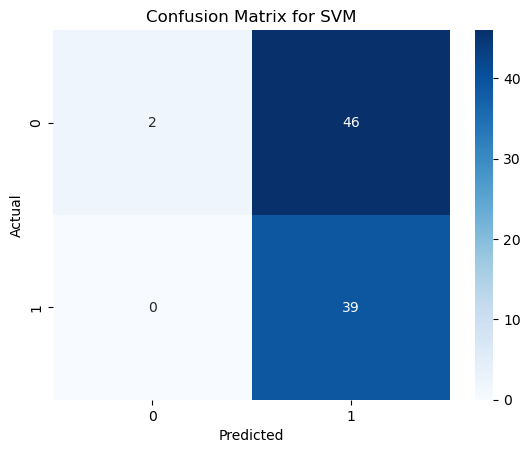



Evaluasi Model: Logistic Regression
Accuracy: 0.4368
Precision: 0.4518
Recall: 0.4368
F1 Score: 0.3826
Confusion Matrix:


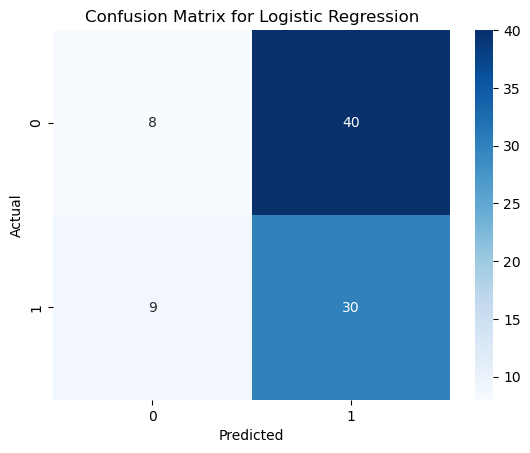



Evaluasi Model: Random Forest
Accuracy: 0.5517
Precision: 0.5752
Recall: 0.5517
F1 Score: 0.5464
Confusion Matrix:


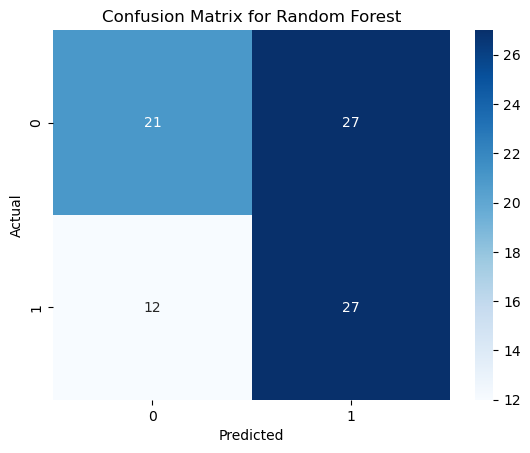

In [7]:
# Evaluation Model

models = {'SVM': y_pred_svm, 'Logistic Regression': y_pred_logreg, 'Random Forest': y_pred_rf}
for model_name, y_pred in models.items():
    print(f"Evaluasi Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n")

**Model Evaluation Insight for SVM**

Based on the evaluation metrics provided, it is clear that the SVM model's performance is not ideal and may need further optimization. Let's break down each metric and provide insights:

1. Accuracy: 0.4713 (47.13%)

- Interpretation: The model correctly predicts 47.13% of the total samples. This accuracy is relatively low and suggests that the model might not be effectively distinguishing between the classes.
- Insight: Low accuracy often indicates that the model might be struggling to identify patterns or features that differentiate the classes, which could lead to poor generalization on unseen data.

2. Precision: 0.7574 (75.74%)

- Interpretation: Precision measures the proportion of true positives (correctly predicted positive samples) out of all predicted positives. With a value of 75.74%, this suggests that when the model predicts a positive class, it is correct about 3/4 of the time.
- Insight: The high precision indicates that the model is good at minimizing false positives. However, this could mean that the model is being overly cautious when predicting positives, possibly leading to many false negatives. This could be problematic if the positive class is of high importance.

3. Recall: 0.4713 (47.13%)

- Interpretation: Recall, also known as sensitivity, measures the proportion of true positives out of all actual positive samples. A recall of 47.13% means that the model is only identifying less than half of the positive samples correctly.
- Insight: Low recall indicates that the model fails to capture many positive instances, leading to high false negatives. This suggests the model might not be sensitive enough to identify positive class samples, which is concerning, especially if the positive class is of greater interest (e.g., identifying a disease).

4. F1 Score: 0.3261 (32.61%)

- Interpretation: The F1 score is the harmonic mean of precision and recall, balancing both metrics. With an F1 score of 32.61%, the model's overall performance is quite poor. This low value suggests that the model's high precision is outweighed by its low recall.
- Insight: The low F1 score indicates an imbalanced performance between precision and recall. The model might be overfitting to certain features or struggling with class imbalance, leading to a lack of robustness in predictions.

5. Confusion Matrics

- Interpretation: The confusion matrix provides more detailed insights into the model's performance:
True Positives (TP): 2 — The number of correctly predicted positive samples.
False Positives (FP): 46 — The number of samples incorrectly predicted as positive.
False Negatives (FN): 0 — The number of samples incorrectly predicted as negative.
True Negatives (TN): 39 — The number of correctly predicted negative samples.

- Insight: The model has a high number of false positives (46) compared to true positives (2). This explains the high precision but low recall, as the model frequently misclassifies negative samples as positive. Additionally, the low number of true positives (82) also highlights that the model is not effectively capturing positive samples.


**Model Evaluation Insight for Logistic Regression**

Based on the evaluation metrics provided for the Logistic Regression model, we can observe a performance that requires improvement. Let's analyze each metric in detail and gain insights from the confusion matrix.

1. Accuracy: 0.4368 (43.68%)

- Interpretation: The model correctly predicts 43.68% of the total samples. This accuracy is quite low, suggesting that the model is not effectively distinguishing between the classes.
- Insight: A low accuracy indicates that the model might be struggling to find the optimal decision boundary between the two classes. It could also mean that the model is not capturing important patterns in the data, resulting in poor generalization.

2. Precision: 0.4518 (45.18%)

- Interpretation: Precision measures the proportion of true positives (correctly predicted positive samples) out of all predicted positives. With a precision of 45.18%, the model is correctly identifying less than half of the predicted positive samples.
- Insight: Low precision indicates that the model is generating a high number of false positives, suggesting that it incorrectly labels many negative instances as positive. This could be a problem if the cost of false positives is high (e.g., false diagnosis).

3. Recall: 0.4368 (43.68%)

- Interpretation: Recall measures the proportion of true positives out of all actual positive samples. A recall of 43.68% means that the model correctly identifies only about 44% of the positive samples.
- Insight: Low recall indicates that the model is missing many positive instances, leading to high false negatives. This suggests the model is not sensitive enough to identify positive samples, which might be problematic depending on the application (e.g., failing to detect a disease).

4. F1 Score: 0.3826 (38.26%)

- Interpretation: The F1 score is the harmonic mean of precision and recall, balancing both metrics. With an F1 score of 38.26%, the model's overall performance is poor, indicating that neither precision nor recall is strong.
- Insight: A low F1 score suggests that the model is underperform in terms of capturing positive instances correctly while also misclassiffies negative ones. This indicates that the model lacks robustness and might require additional tuning or feature engineering.

5. Confusion Matrics

- Interpretation: The confusion matrix provides a detailed breakdown of the model's performance:
True Positives (TP): 8 — The number of correctly predicted positive samples.
False Positives (FP): 40 — The number of samples incorrectly predicted as positive (actual class is negative).
False Negatives (FN): 9 — The number of samples incorrectly predicted as negative (actual class is positive).
True Negatives (TN): 30 — The number of correctly predicted negative samples.

- Insight: The model has a high number of false positives (40) compared to true positives (8). This explains the low precision and indicates that the model is over-predicting the positive class. Additionally, the number of false negatives (9) is slightly higher than the true positives, contributing to the low recall.


**Model Evaluation Insight for Random Forest**

The evaluation metrics for the Random Forest model show a moderate level of performance, with relatively balanced precision and recall values. Lets break down each metric and gain insights from the confusion matrix to better understand the model's strengths and weaknesses.

1. Accuracy: 0.5517 (55.17%)

- Interpretation: The model correctly predicts 55.17% of the total samples. This accuracy is slightly above random guessing for a binary classification task, indicating that the model is capturing some patterns in the data, but there is still room for improvement.
- Insight: An accuracy of 55.17% suggests that the model is not yet optimal. It is likely that the decision boundaries are not effectively capturing the characteristics of both classes, leading to moderate performance.

2. Precision: 0.5752 (57.52%)

- Interpretation: Precision measures the proportion of true positives (correctly predicted positive samples) out of all predicted positives. With a precision of 57.52%, the model is correctly identifying slightly more than half of the predicted positive samples.
- Insight: This indicates that while the model is not over-predicting positives, it is still not highly confident in identifying true positives. This could be problematic in scenarios where a high false-positive rate is undesirable (e.g., predicting disease when none exists).

3.Recall: 0.5517 (55.17%)

- Interpretation: Recall, also known as sensitivity, measures the proportion of true positives out of all actual positive samples. A recall of 55.17% means that the model correctly identifies just over half of the actual positive samples.
- Insight: A recall of 55.17% indicates that the model is missing a significant number of positive instances, which can lead to high false negatives. Improving recall is essential if the cost of missing positive cases is high.

4. F1 Score: 0.5464 (54.64%)

- Interpretation: The F1 score is the harmonic mean of precision and recall, balancing both metrics. With an F1 score of 54.64%, the model overall performance is moderate, indicating that it is neither highly precise nor highly sensitive.
- Insight: The F1 score reflects a balanced trade-off between precision and recall, but it also suggests that there is a need for optimization to push both metrics higher. This is especially relevant when the classes are not well-separated or when there is a class imbalance.

5. Confusion Matric

- Interpretation: The confusion matrix provides a detailed breakdown of the model’s performance:
True Positives (TP): 21 — The number of correctly predicted positive samples.
False Positives (FP): 27 — The number of samples incorrectly predicted as positive (actual class is negative).
False Negatives (FN): 12 — The number of samples incorrectly predicted as negative (actual class is positive).
True Negatives (TN): 27 — The number of correctly predicted negative samples.
- Insight: The confusion matrix shows a relatively balanced number of true positives (21) and true negatives (27). However, the high number of false positives (27) compared to false negatives (12) suggests that the model might be over-predicting the positive class. This imbalance needs to be addressed to improve the overall robustness of the model.



**Conclusion**

The Random Forest model shows a moderate performance, with an accuracy of 55.17% and balanced precision and recall scores. While the model is able to identify both classes to a certain extent, it requires further tuning and optimization to reduce the number of false positives and false negatives. Focusing on hyperparameter tuning, handling class imbalance, and exploring additional features or alternative models will likely lead to better results.

## Hyperparameter Tuning

In [8]:
# Define parameters for hyperparameter tuning
rf_params = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                 # Use bootstrap sampling
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Use StratifiedKFold to handle data imbalance
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
rf_grid = GridSearchCV(estimator=rf_model, 
                       param_grid=rf_params, 
                       scoring='accuracy',    # Use accuracy as the scoring metric
                       n_jobs=-1,             # Use all available processors
                       cv=cv_strategy,        # Use StratifiedKFold
                       verbose=2,             # Display the search results
                       return_train_score=True)  # Return training set results as well

# Fit GridSearchCV on the training data
rf_grid.fit(X_train, y_train)

# Predict using the best model from GridSearchCV
y_pred_rf_grid = rf_grid.predict(X_test)

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 10, Finished, Available, Finished)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s


2024-10-03:06:39:48,592 WARNING  [tracking_store.py:153] log_inputs not supported


In [9]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_grid), flush=True)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_grid), flush=True)

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 11, Finished, Available, Finished)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_sa

2024-10-03:06:40:59,78 WARNING  [tracking_store.py:153] log_inputs not supported


**Model Evaluation Insight for Random Forest Hyperparameter Tuning**

Based on the provided results and evaluation metrics, the Random Forest model’s performance shows some potential issues related to overfitting and imbalance in class prediction. Here’s a detailed breakdown and insight:

1. Confusion Matrix Analysis

- True Positives (TP): 16 — The number of correctly predicted class 0 samples.
- False Positives (FP): 32 — The number of samples incorrectly predicted as class 0 (actual class is 1).
- False Negatives (FN): 11 — The number of samples incorrectly predicted as class 1 (actual class is 0).
- True Negatives (TN): 28 — The number of correctly predicted class 1 samples.

- Insight: The model is making a large number of false positives (32), indicating that it often misclassifies actual class 1 samples as class 0. This could suggest that the decision boundary is not clearly defined or that the model is biased towards predicting class 0. The number of false negatives (11) is also non-trivial, indicating that the model struggles to identify all positive class instances.

2. Classification Report Analysis 📝

- Precision for Class 0 (59%): The model is correct 59% of the time when it predicts class 0. This shows that while the model has some ability to correctly identify class 0 samples, there is still a significant number of misclassifications.

- Recall for Class 0 (33%): The model correctly identifies only 33% of all actual class 0 samples. This low recall value indicates that the model is missing a lot of true class 0 samples (high false negative rate).

- Precision for Class 1 (47%): For class 1, the model correctly identifies 47% of the predicted samples. This low precision is due to the high number of false positives.

- Recall for Class 1 (72%): The model correctly identifies 72% of actual class 1 samples, which is relatively good. This suggests that the model is more sensitive towards class 1 but at the cost of incorrectly predicting class 0 as class 1.

- Overall Accuracy (51%): The overall accuracy of 51% is just slightly better than random guessing in a binary classification task. This indicates that the model is not performing well in distinguishing between the two classes.

3. Overfitting Indications

- The best model’s train score is 0.9659 (96.59%) while its test score is 0.5884 (58.84%).
- Difference: The difference between train and test score is 0.3775 (37.75%).
- Insight: This significant gap between training and testing performance is a clear indication of overfitting. The model fits very well on the training data but fails to generalize to the test set. This could be due to overly complex hyperparameters or insufficient regularization.


**Recommendations for Improvement**

1. Reduce Overfitting:

Try increasing the values of min_samples_split and min_samples_leaf to reduce overfitting. This will prevent the model from learning too specific patterns that do not generalize.
Limit the maximum depth (max_depth) further, possibly below 10, to simplify the model.

2. Address Class Imbalance:

If the dataset is imbalanced, consider using techniques like SMOTE (Synthetic Minority Oversampling Technique) or class weighting in the Random Forest classifier (class_weight='balanced') to handle the class imbalance.



**Conclusion**

The Random Forest model, despite hyperparameter tuning, shows signs of overfitting and moderate performance on the test set. Focusing on reducing overfitting and handling class imbalance can help improve generalization and predictive power. Refining the hyperparameters and exploring alternative models could yield better results.

In [10]:
# predict excecution in data

df['label_predict'] = rf_grid.best_estimator_.predict(df.drop('label', axis=1))

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 12, Finished, Available, Finished)

In [11]:
display(df)

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 13, Finished, Available, Finished)

In [12]:
# 1. Correlation Analysis
correlation_matrix = df.corr()

# Visualization heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur EEG")
plt.show()

# 2. Scatter Plot eeg feature and label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TP9_mean', y='TP9_variance', hue='label_predict', data=df)
plt.title("Scatter Plot TP9 Mean vs. TP9 Variance berdasarkan label_predict")
plt.show()

# 3. Distribution Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='AF7_mean', data=df)
plt.title("Distribusi AF7 Mean Berdasarkan Label")
plt.show()

StatementMeta(, a2df815a-f9cd-457b-9d92-de0497f05025, 14, Finished, Available, Finished)